In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, r2_score

# PRELIMINARY EXAMINATION OF THE DATA

In [2]:
df=pd.read_csv("tested.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [3]:
df.shape

(418, 12)

In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


# DATA VİSUALİZATİON

<AxesSubplot:>

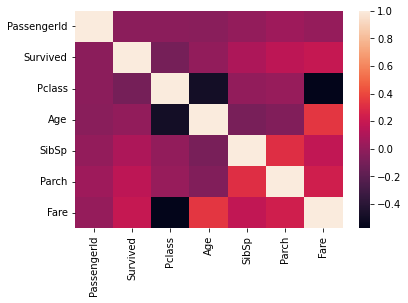

In [6]:
sns.heatmap(df.corr())

<AxesSubplot:xlabel='Age', ylabel='Count'>

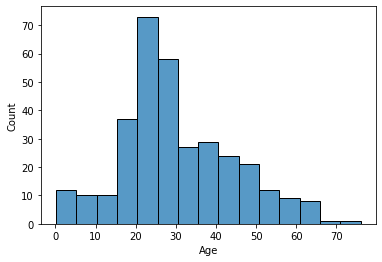

In [7]:
sns.histplot(df["Age"])

<AxesSubplot:xlabel='Survived', ylabel='count'>

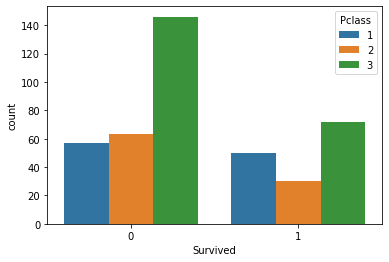

In [8]:
sns.countplot(x="Survived", hue="Pclass", data=df)

<AxesSubplot:xlabel='Survived', ylabel='count'>

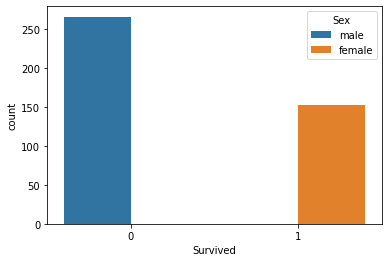

In [9]:
sns.countplot(x="Survived", hue="Sex", data=df)

# COMPLETION OF MISSING DATA

In [10]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

<AxesSubplot:>

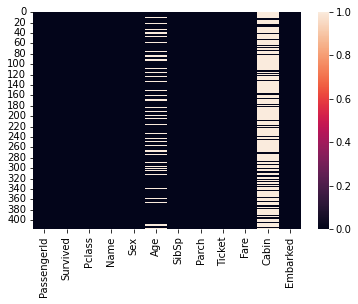

In [11]:
sns.heatmap(df.isnull())   #HEAT GRAPH OF THE MISSING DATA

In [12]:
df=df.drop(["Cabin"], axis=1)    #the missing value in column "cabin" is too high, the milk has been removed

In [13]:
#The missing values in the Age column have been filled in with the age frequency
df["Age"]=df["Age"].fillna(value=df["Age"].idxmax())

In [14]:
df=df.dropna()
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [15]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [16]:
df.dtypes  #The data types of the columns are examined. Those of the Object type are returned to the number type

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

In [17]:
sex=pd.get_dummies(df["Sex"],drop_first=True) #Translated into the number type of "sex" milk
sex.head()

,male
0,1
1,0
2,1
3,1
4,0


In [18]:
embarked=pd.get_dummies(df["Embarked"],drop_first=True) #Translated into the number type of "Embarked" milk
embarked.head()

,Q,S
0,1,0
1,0,1
2,1,0
3,0,1
4,0,1


In [19]:
df=pd.concat([df,sex,embarked],axis=1) #Columns translated to the number type df are added

In [20]:
df=df.drop(["PassengerId","Name","Sex","Ticket","Embarked"],axis=1) #Columns that will not be used are deleted from df

In [21]:
df         #the final version to enter into the df ML algorithm

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,34.5,0,0,7.8292,1,1,0
1,1,3,47.0,1,0,7.0000,0,0,1
2,0,2,62.0,0,0,9.6875,1,1,0
3,0,3,27.0,0,0,8.6625,1,0,1
4,1,3,22.0,1,1,12.2875,0,0,1
...,...,...,...,...,...,...,...,...,...
413,0,3,96.0,0,0,8.0500,1,0,1
414,1,1,39.0,0,0,108.9000,0,0,0
415,0,3,38.5,0,0,7.2500,1,0,1
416,0,3,96.0,0,0,8.0500,1,0,1


# SETTING UP A ML MODEL

In [22]:
X=df[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male', 'Q', 'S']]  #Input variables
y=df["Survived"]     # Output variable

In [23]:
#The data set is divided into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)

In [24]:
lr=LogisticRegression(max_iter=500)  #The model is installed
lr.fit(X_train, y_train)

LogisticRegression(max_iter=500)

In [25]:
lr.coef_

array([[-8.72806702e-02, -2.09457102e-03,  1.14793130e-01,
         1.22556666e-01,  1.76040799e-03, -6.05682355e+00,
         4.89774615e-01, -8.34942010e-02]])

In [26]:
lr.intercept_

array([2.82905698])

In [27]:
lr.score(X_test, y_test)

1.0

In [28]:
lr.score(X_train, y_train)

1.0

# MODEL EVALUATION

In [29]:
test_lineer_=lr.predict(X_test)
print(f"r-2 scoore:{r2_score(test_lineer_,y_test)}")

r-2 scoore:1.0


In [30]:
confusion_matrix(test_lineer_,y_test)

array([[78,  0],
       [ 0, 48]], dtype=int64)

In [31]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,34.5,0,0,7.8292,1,1,0
1,1,3,47.0,1,0,7.0000,0,0,1
2,0,2,62.0,0,0,9.6875,1,1,0
3,0,3,27.0,0,0,8.6625,1,0,1
4,1,3,22.0,1,1,12.2875,0,0,1


In [32]:
name1=np.array([[3,34.5,0,0,7.8292,1,1,0]])
lr.predict(name1)

C:\Users\Esat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [33]:
name2=np.array([[3,47,1,0,7,0,0,1]])
lr.predict(name2)

C:\Users\Esat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1], dtype=int64)